# COVID-19 Economic Impacts

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import linregress
import seaborn as sns
import requests

# Impact of COVID-19 on Global Market Indices

This section will examine major market indices in the US, Europe and Asia during the COVID-19 pandemic. It will specifically focus on the impacts on these regions of the initial outbreak and the subsequent major variants by calculating the average rate of change for the indices in each region.

In [23]:
data_path = "./Index_Data/"
fig_path = "./Plots/"

#Listing out the different indices we're looking at and assigning them to specific regions
glb_ind = ["SPY", "DIA", "^IXIC", "^BUK100P", "^GDAXI", "^FCHI", "^N225", "000001.SS","^HSI","^KS11","IMOEX.ME"]
regions = {"US":["SPY", "DIA", "^IXIC"], "Europe": ["^BUK100P","^GDAXI","^FCHI","IMOEX.ME"], 
           "Asia":["^N225", "000001.SS","^HSI","^KS11"]}
#Listing the date each variant was declared a Variant of Concern by the WHO. 
#Using the date that the WHO was informed of the Covid-19 virus for initial
var_dates = {"Initial": pd.to_datetime("12-31-2019", format="%m-%d-%Y"), 
             "Alpha":pd.to_datetime("12-18-2020", format="%m-%d-%Y"),
             "Gamma":pd.to_datetime("1-11-2021", format="%m-%d-%Y"), 
             "Delta":pd.to_datetime("5-11-2021", format="%m-%d-%Y"), 
             "Omicron":pd.to_datetime("11-26-2021", format="%m-%d-%Y")}

In [24]:
#Reading in the CSV files sourced from Yahoo Finance
for n in range(len(glb_ind)):
    ind = glb_ind[n]
    
    #Reading in the first csv file
    if n == 0:
        global_df = pd.read_csv(data_path + ind + ".csv")
        #Getting rid of the columns other than Date, Open and Close since they're not needed
        global_df = global_df[["Date", "Open", "Close"]]
        #Labeling the Open and CLose columns with the index they correspond to
        global_df.rename(columns={"Open":f"{ind} Open", "Close":f"{ind} Close"}, inplace=True)
    else:
        #Making a temporary dataframe to merge with the first dataframe and getting the needed columns
        temp_df = pd.read_csv(data_path + ind + ".csv")
        temp_df = temp_df[["Date", "Open", "Close"]]
        temp_df.rename(columns={"Open":f"{ind} Open", "Close":f"{ind} Close"}, inplace=True)
        #Merging on Date
        global_df = global_df.merge(temp_df, how = 'left', on = 'Date')
global_df

,Date,SPY Open,SPY Close,DIA Open,DIA Close,^IXIC Open,^IXIC Close,^BUK100P Open,^BUK100P Close,^GDAXI Open,...,^N225 Open,^N225 Close,000001.SS Open,000001.SS Close,^HSI Open,^HSI Close,^KS11 Open,^KS11 Close,IMOEX.ME Open,IMOEX.ME Close
0,2019-12-31,320.529999,321.859985,283.910004,285.100006,8918.740234,8972.599609,NaN,NaN,NaN,...,NaN,NaN,3036.385986,3050.124023,28241.429688,28189.750000,NaN,NaN,NaN,NaN
1,2020-01-02,323.540009,324.869995,286.440002,288.619995,9039.459961,9092.190430,755.289978,760.349976,13233.709961,...,NaN,NaN,3066.335938,3085.197998,28249.369141,28543.519531,2201.209961,2175.169922,NaN,NaN
2,2020-01-03,321.160004,322.410004,285.339996,286.320007,8976.429688,9020.769531,760.359985,760.780029,13266.389648,...,NaN,NaN,3089.021973,3083.785889,28828.359375,28451.500000,2192.580078,2176.459961,3059.199951,3076.370117
3,2020-01-06,320.489990,323.640015,284.290009,286.980011,8943.500000,9071.469727,760.780029,756.409973,13085.490234,...,23319.759766,23204.859375,3070.908936,3083.407959,28326.500000,28226.189453,2154.969971,2155.070068,3075.550049,3078.870117
4,2020-01-07,323.019989,322.730011,286.299988,285.739990,9076.639648,9068.580078,756.409973,756.809998,13199.589844,...,23320.119141,23575.720703,3085.488037,3104.802002,28352.679688,28322.060547,2166.600098,2175.540039,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,2022-04-29,423.589996,412.000000,337.619995,329.690002,12710.419922,12334.639648,746.559998,750.309998,14095.929688,...,NaN,NaN,2986.060059,3047.060059,20271.400391,21089.390625,2669.179932,2695.050049,2390.830078,2445.169922
588,2022-05-02,412.070007,414.480011,330.350006,330.739990,12331.690430,12536.019531,750.309998,750.309998,13996.820313,...,26851.099609,26818.529297,NaN,NaN,NaN,NaN,2669.209961,2687.449951,NaN,NaN
589,2022-05-03,415.010010,416.380005,331.179993,331.250000,12511.459961,12563.759766,750.309998,751.590027,13958.919922,...,NaN,NaN,NaN,NaN,20927.619141,21101.890625,2690.159912,2680.459961,NaN,NaN
590,2022-05-04,417.079987,429.059998,331.799988,340.589996,12574.730469,12964.860352,751.590027,746.479980,14020.900391,...,NaN,NaN,NaN,NaN,21025.699219,20869.519531,2690.449951,2677.570068,2444.250000,2373.159912


In [25]:
#Copying the original dataframe
clean_global_df = global_df.copy()

#Converting the Data column into a datetime object
clean_global_df['Date'] = pd.to_datetime(clean_global_df['Date'], format="%Y-%m-%d")

#This loop sets values in the Open and Close that are NaN values equal to the previous Closing value 
#except if they're in the first row. Then they're set equal to the first non-null Opening value.
#This is being done due to stock markets having different days they're closed to avoid a large loss of data.
for ind, row in clean_global_df.iterrows():
    for key in glb_ind:
        
        #Testing if the Open value for each index in a row is NaN
        if pd.isnull(row[f"{key} Open"]):
            #If it is in the first row, tests each subsequent value in the column for null values until it finds one
            #with a non-null value. Then it sets it equal to that and breaks the loop
            if ind == 0:
                for n in range(len(clean_global_df)):
                    if pd.isnull(clean_global_df[f"{key} Open"][n]) == False:
                        clean_global_df[f"{key} Open"][ind] = clean_global_df[f"{key} Open"][n]
                        clean_global_df[f"{key} Close"][ind] = clean_global_df[f"{key} Open"][n]
                        break
            
            #If the null value isn't in the first row, copy the close from the previous row
            else:
                clean_global_df[f"{key} Open"][ind] = clean_global_df[f"{key} Close"][ind-1]
                clean_global_df[f"{key} Close"][ind] = clean_global_df[f"{key} Close"][ind-1]
clean_global_df

/var/folders/pw/560ckmv16jlbprb_m90q6yx40000gn/T/ipykernel_86066/3302699026.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_global_df[f"{key} Open"][ind] = clean_global_df[f"{key} Open"][n]
/var/folders/pw/560ckmv16jlbprb_m90q6yx40000gn/T/ipykernel_86066/3302699026.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_global_df[f"{key} Close"][ind] = clean_global_df[f"{key} Open"][n]
/var/folders/pw/560ckmv16jlbprb_m90q6yx40000gn/T/ipykernel_86066/3302699026.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

,Date,SPY Open,SPY Close,DIA Open,DIA Close,^IXIC Open,^IXIC Close,^BUK100P Open,^BUK100P Close,^GDAXI Open,...,^N225 Open,^N225 Close,000001.SS Open,000001.SS Close,^HSI Open,^HSI Close,^KS11 Open,^KS11 Close,IMOEX.ME Open,IMOEX.ME Close
0,2019-12-31,320.529999,321.859985,283.910004,285.100006,8918.740234,8972.599609,755.289978,755.289978,13233.709961,...,23319.759766,23319.759766,3036.385986,3050.124023,28241.429688,28189.750000,2201.209961,2201.209961,3059.199951,3059.199951
1,2020-01-02,323.540009,324.869995,286.440002,288.619995,9039.459961,9092.190430,755.289978,760.349976,13233.709961,...,23319.759766,23319.759766,3066.335938,3085.197998,28249.369141,28543.519531,2201.209961,2175.169922,3059.199951,3059.199951
2,2020-01-03,321.160004,322.410004,285.339996,286.320007,8976.429688,9020.769531,760.359985,760.780029,13266.389648,...,23319.759766,23319.759766,3089.021973,3083.785889,28828.359375,28451.500000,2192.580078,2176.459961,3059.199951,3076.370117
3,2020-01-06,320.489990,323.640015,284.290009,286.980011,8943.500000,9071.469727,760.780029,756.409973,13085.490234,...,23319.759766,23204.859375,3070.908936,3083.407959,28326.500000,28226.189453,2154.969971,2155.070068,3075.550049,3078.870117
4,2020-01-07,323.019989,322.730011,286.299988,285.739990,9076.639648,9068.580078,756.409973,756.809998,13199.589844,...,23320.119141,23575.720703,3085.488037,3104.802002,28352.679688,28322.060547,2166.600098,2175.540039,3078.870117,3078.870117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,2022-04-29,423.589996,412.000000,337.619995,329.690002,12710.419922,12334.639648,746.559998,750.309998,14095.929688,...,26847.900391,26847.900391,2986.060059,3047.060059,20271.400391,21089.390625,2669.179932,2695.050049,2390.830078,2445.169922
588,2022-05-02,412.070007,414.480011,330.350006,330.739990,12331.690430,12536.019531,750.309998,750.309998,13996.820313,...,26851.099609,26818.529297,3047.060059,3047.060059,21089.390625,21089.390625,2669.209961,2687.449951,2445.169922,2445.169922
589,2022-05-03,415.010010,416.380005,331.179993,331.250000,12511.459961,12563.759766,750.309998,751.590027,13958.919922,...,26818.529297,26818.529297,3047.060059,3047.060059,20927.619141,21101.890625,2690.159912,2680.459961,2445.169922,2445.169922
590,2022-05-04,417.079987,429.059998,331.799988,340.589996,12574.730469,12964.860352,751.590027,746.479980,14020.900391,...,26818.529297,26818.529297,3047.060059,3047.060059,21025.699219,20869.519531,2690.449951,2677.570068,2444.250000,2373.159912


In [26]:
perc_change_df = clean_global_df.copy()

#Calculates the percent change from open to Close for each date of the indices and creates a new dataframe
for ind in glb_ind:
    perc_change_df.insert(perc_change_df.columns.get_loc(f"{ind} Close")+1,
                          f"{ind} Percent Change", 
                        100 * (perc_change_df[f"{ind} Close"] - perc_change_df[f"{ind} Open"])
                          /perc_change_df[f"{ind} Open"])   

perc_change_df

,Date,SPY Open,SPY Close,SPY Percent Change,DIA Open,DIA Close,DIA Percent Change,^IXIC Open,^IXIC Close,^IXIC Percent Change,...,000001.SS Percent Change,^HSI Open,^HSI Close,^HSI Percent Change,^KS11 Open,^KS11 Close,^KS11 Percent Change,IMOEX.ME Open,IMOEX.ME Close,IMOEX.ME Percent Change
0,2019-12-31,320.529999,321.859985,0.414933,283.910004,285.100006,0.419148,8918.740234,8972.599609,0.603890,...,0.452447,28241.429688,28189.750000,-0.182992,2201.209961,2201.209961,0.000000,3059.199951,3059.199951,0.000000
1,2020-01-02,323.540009,324.869995,0.411073,286.440002,288.619995,0.761064,9039.459961,9092.190430,0.583336,...,0.615134,28249.369141,28543.519531,1.041264,2201.209961,2175.169922,-1.182988,3059.199951,3059.199951,0.000000
2,2020-01-03,321.160004,322.410004,0.389214,285.339996,286.320007,0.343454,8976.429688,9020.769531,0.493959,...,-0.169506,28828.359375,28451.500000,-1.307252,2192.580078,2176.459961,-0.735212,3059.199951,3076.370117,0.561263
3,2020-01-06,320.489990,323.640015,0.982878,284.290009,286.980011,0.946218,8943.500000,9071.469727,1.430869,...,0.407014,28326.500000,28226.189453,-0.354123,2154.969971,2155.070068,0.004645,3075.550049,3078.870117,0.107950
4,2020-01-07,323.019989,322.730011,-0.089771,286.299988,285.739990,-0.195598,9076.639648,9068.580078,-0.088795,...,0.625961,28352.679688,28322.060547,-0.107994,2166.600098,2175.540039,0.412625,3078.870117,3078.870117,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,2022-04-29,423.589996,412.000000,-2.736135,337.619995,329.690002,-2.348792,12710.419922,12334.639648,-2.956474,...,2.042826,20271.400391,21089.390625,4.035194,2669.179932,2695.050049,0.969216,2390.830078,2445.169922,2.272844
588,2022-05-02,412.070007,414.480011,0.584853,330.350006,330.739990,0.118052,12331.690430,12536.019531,1.656943,...,0.000000,21089.390625,21089.390625,0.000000,2669.209961,2687.449951,0.683348,2445.169922,2445.169922,0.000000
589,2022-05-03,415.010010,416.380005,0.330111,331.179993,331.250000,0.021139,12511.459961,12563.759766,0.418015,...,0.000000,20927.619141,21101.890625,0.832734,2690.159912,2680.459961,-0.360572,2445.169922,2445.169922,0.000000
590,2022-05-04,417.079987,429.059998,2.872353,331.799988,340.589996,2.649189,12574.730469,12964.860352,3.102491,...,0.000000,21025.699219,20869.519531,-0.742804,2690.449951,2677.570068,-0.478726,2444.250000,2373.159912,-2.908462


In [27]:
var_list = list(var_dates.keys())
num = 0
sep_dates = {}

#This separates the dataframe into new ones based on which variant was most recently designated as a VOC.
#They are stored in a dictionary so that they can be called easily using the variant name.
for var in var_dates.keys():
    if var == var_list[-1]:
        sep_dates[var] = perc_change_df.loc[perc_change_df['Date'] >= var_dates[var]]
        sep_dates[var].reset_index(drop = True, inplace = True)
    else:
        transition = perc_change_df.loc[perc_change_df['Date'] >= var_dates[var]]
        sep_dates[var] = transition.loc[transition['Date'] < var_dates[var_list[num+1]]]
        sep_dates[var].reset_index(drop = True, inplace = True)  
    
    num += 1
sep_dates

{'Initial':           Date    SPY Open   SPY Close  SPY Percent Change    DIA Open  \
 0   2019-12-31  320.529999  321.859985            0.414933  283.910004   
 1   2020-01-02  323.540009  324.869995            0.411073  286.440002   
 2   2020-01-03  321.160004  322.410004            0.389214  285.339996   
 3   2020-01-06  320.489990  323.640015            0.982878  284.290009   
 4   2020-01-07  323.019989  322.730011           -0.089771  286.299988   
 ..         ...         ...         ...                 ...         ...   
 240 2020-12-11  364.899994  366.299988            0.383665  299.429993   
 241 2020-12-14  368.640015  364.660004           -1.079647  303.019989   
 242 2020-12-15  367.399994  369.589996            0.596081  300.950012   
 243 2020-12-16  369.820007  370.170013            0.094642  302.540009   
 244 2020-12-17  371.940002  372.239990            0.080655  303.220001   
 
       DIA Close  DIA Percent Change    ^IXIC Open   ^IXIC Close  \
 0    285.100006   

In [28]:
rolling_df = {}

#Calculates the rolling average for the percent change in order to smooth the data for visualization
for var in sep_dates.keys():
    rolling_df[var] = sep_dates[var].copy()
    for ind in glb_ind:
        rolling_df[var][f"{ind} Percent Change (Rolling Avg)"] = sep_dates[var][f"{ind} Percent Change"].rolling(5, min_periods = 1).mean()
        rolling_df[var] = rolling_df[var].dropna()
rolling_df['Omicron']

,Date,SPY Open,SPY Close,SPY Percent Change,DIA Open,DIA Close,DIA Percent Change,^IXIC Open,^IXIC Close,^IXIC Percent Change,...,DIA Percent Change (Rolling Avg),^IXIC Percent Change (Rolling Avg),^BUK100P Percent Change (Rolling Avg),^GDAXI Percent Change (Rolling Avg),^FCHI Percent Change (Rolling Avg),^N225 Percent Change (Rolling Avg),000001.SS Percent Change (Rolling Avg),^HSI Percent Change (Rolling Avg),^KS11 Percent Change (Rolling Avg),IMOEX.ME Percent Change (Rolling Avg)
0,2021-11-26,462.339996,458.970001,-0.728900,350.329987,349.019989,-0.373933,15664.379883,15491.660156,-1.102627,...,-0.373933,-1.102627,-3.646975,-0.824631,-1.103023,-1.953493,-0.336120,-1.722914,-1.231066,-1.090322
1,2021-11-29,464.070007,464.600006,0.114207,352.589996,351.190002,-0.397060,15719.419922,15782.830078,0.403387,...,-0.385496,-0.349620,-1.308655,-0.857955,-0.955236,-1.072098,0.314133,-0.983266,-0.560991,-0.450252
2,2021-11-30,462.000000,455.559998,-1.393940,348.700012,344.899994,-1.089767,15716.500000,15537.690430,-1.137719,...,-0.620253,-0.612320,-1.040646,-0.610556,-0.426562,-1.635066,0.145382,-1.086633,-1.438992,0.242639
3,2021-12-01,461.640015,450.500000,-2.413139,348.040009,340.459991,-2.177916,15752.269531,15254.049805,-3.162844,...,-1.009669,-1.249951,-0.473109,-0.065194,0.075183,-1.164498,0.214318,-0.747854,-0.733106,0.515470
4,2021-12-02,450.730011,457.399994,1.479818,341.809998,346.609985,1.404285,15181.820313,15381.320313,1.314072,...,-0.526878,-0.737146,-0.481788,-0.101330,0.063031,-0.904776,0.174757,-0.373085,-0.095083,0.450192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2022-04-29,423.589996,412.000000,-2.736135,337.619995,329.690002,-2.348792,12710.419922,12334.639648,-2.956474,...,-0.364889,-0.621256,0.026506,-0.289853,-0.383437,0.263440,0.250527,0.725723,0.152193,1.592364
107,2022-05-02,412.070007,414.480011,0.584853,330.350006,330.739990,0.118052,12331.690430,12536.019531,1.656943,...,-0.585593,-0.690959,0.385950,-0.395553,-0.513825,0.315382,0.947630,1.135156,0.434865,2.040422
108,2022-05-03,415.010010,416.380005,0.330111,331.179993,331.250000,0.021139,12511.459961,12563.759766,0.418015,...,-0.251218,0.054199,0.432298,0.189337,-0.151866,0.347615,1.248062,1.356061,0.405308,0.876646
109,2022-05-04,417.079987,429.059998,2.872353,331.799988,340.589996,2.649189,12574.730469,12964.860352,3.102491,...,0.329536,0.693816,0.161457,0.068888,-0.474568,0.291757,0.610003,0.981476,0.245091,-0.547683


In [29]:
#Making a new dataframe which stores the mean of the Rolling Averages for each region
roll_mean_df = {}
for var in rolling_df.keys():
    roll_mean_df[var] = rolling_df[var].copy()
    for reg in regions.keys():
        reg_col = [f"{ind} Percent Change (Rolling Avg)" for ind in regions[reg]]
        roll_mean_df[var][f"{reg} Average Percent Change"] = roll_mean_df[var].loc[:, reg_col].sum(axis = 1)/len(regions[reg])

In [30]:
#Function to make plotting each region in the same figure quicker
def reg_plot(df, regions = regions):
    colors = {'US':'r','Europe':'b', 'Asia':'g'}
    plt.figure(figsize=(10,5))
    for reg in regions.keys():
        plt.plot(df["Date"], df[f"{reg} Average Percent Change"], color=colors[reg])
    plt.legend(regions.keys())


# Plots

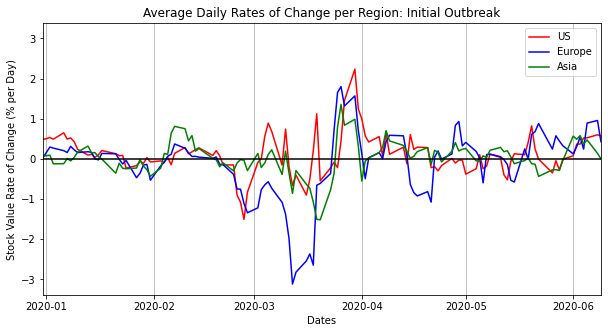

In [31]:
#Creating and saving the figure for the initial outbreak
reg_plot(roll_mean_df['Initial'][:len(roll_mean_df['Omicron'])])
plt.axhline(y=0, color='k', linestyle='-')
plt.xlim(roll_mean_df['Initial']['Date'][0], roll_mean_df['Initial']['Date'][len(roll_mean_df['Omicron'])-1])
plt.title("Average Daily Rates of Change per Region: Initial Outbreak")
plt.xlabel('Dates')
low, high = plt.ylim()
plt.ylim(-max(abs(low), abs(high)),max(abs(low), abs(high)))
plt.ylabel('Stock Value Rate of Change (% per Day)')
plt.grid(axis='x')
plt.savefig(fig_path+"initial_stocks.png")
plt.show()

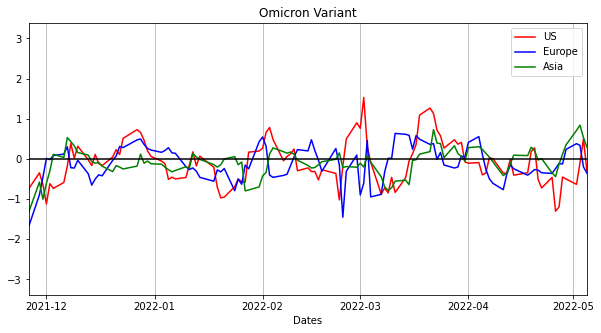

In [32]:
#Creating and saving the figure for the Omicron variant
reg_plot(roll_mean_df['Omicron'])
plt.axhline(y=0, color='k', linestyle='-')
plt.xlim(roll_mean_df['Omicron']['Date'][0], roll_mean_df['Omicron']['Date'][len(roll_mean_df['Omicron'])-1])
plt.ylim(-max(abs(low), abs(high)),max(abs(low), abs(high)))
plt.title("Omicron Variant")
plt.xlabel('Dates')
plt.grid(axis='x')
plt.savefig(fig_path+"omicron_stocks.png")
plt.show()


In [33]:
#Calculating the greatest rate of decrease in each region per variant
max_fall = {reg:[] for reg in regions}
for var in roll_mean_df.keys():
    for reg in regions.keys():
        max_fall[reg].append(abs(roll_mean_df[var][f"{reg} Average Percent Change"].min()))
max_fall

{'US': [1.505018841777525,
  0.42191083100545246,
  0.9130540530981791,
  0.7227034822204317,
  1.300452321077629],
 'Europe': [3.114733036946165,
  0.7040934553732927,
  0.6311558548546843,
  0.6788212841943524,
  1.6662377546162443],
 'Asia': [1.5150306527186443,
  0.3818513527165525,
  0.860494223855038,
  0.7562859414669247,
  1.3108984698324568]}

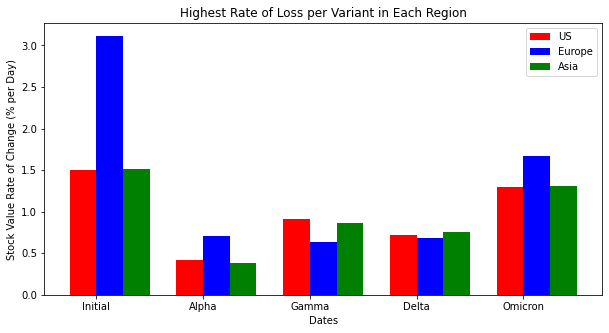

In [34]:
#Creating a bar graph to display the greatest rate of decrease in each region in the same figure
r = np.arange(len(var_list))
width = 0.25
n=0
colors = {'US':'r','Europe':'b', 'Asia':'g'}

plt.figure(figsize=(10,5))
for reg in regions.keys():
    #Offsetting each bar by the width of the bars and plotting them
    plt.bar(r+(n*width),max_fall[reg], width=width, color = colors[reg])
    
    n+=1
plt.xticks(r + width/2,var_list)
plt.legend(regions.keys())
plt.xlabel('Dates')
plt.ylabel('Stock Value Rate of Change (% per Day)')
plt.title('Highest Rate of Loss per Variant in Each Region')
plt.savefig(fig_path+"max_loss.png")
plt.show()

# Impacts on Virtual vs. In Person Fitness Stocks

Data sets pulled from Yahoo Finance for Peloton and Planet Fitness historical stock data per month.  COVID-19 disease designation and vaccine rollout dates compared against monthly stock closing prices per company.

In [37]:
# Study data files.
PLNT_Stock_data = "./Fitness_Data/PLNT.csv"
PTON_Stock_data = "./Fitness_Data/PTON.csv"
COVID_19_data = "./Fitness_Data/COVID.csv"

# Read the NFLX and AMC stock CVS files.
PLNT_Stock_df = pd.read_csv(PLNT_Stock_data)
PTON_Stock_df = pd.read_csv(PTON_Stock_data)
COVID_19_df = pd.read_csv(COVID_19_data)

In [38]:
PLNT_Stock_df["Company"] = "Planet Fitness"

In [39]:
PLNT_Stock_df.head()

,Date,Close,Company
0,1/1/20,80.790001,Planet Fitness
1,2/1/20,67.489998,Planet Fitness
2,3/1/20,48.700001,Planet Fitness
3,4/1/20,60.330002,Planet Fitness
4,5/1/20,64.629997,Planet Fitness


In [40]:
PTON_Stock_df["Company"] = "Peloton"

In [41]:
PTON_Stock_df.head()

,Date,Close,Company
0,1/1/20,32.360001,Peloton
1,2/1/20,26.690001,Peloton
2,3/1/20,26.549999,Peloton
3,4/1/20,31.500000,Peloton
4,5/1/20,42.189999,Peloton


In [42]:
COVID_19_df.head()

,"Date,COVID-19 Label,Vaccine Status"
0,"12/31/19,Viral pneumonia' in Wuhan,No vaccine"
1,"1/1/20,Viral pneumonia' in Wuhan,No vaccine"
2,"1/2/20,Viral pneumonia' in Wuhan,No vaccine"
3,"1/3/20,Viral pneumonia' in Wuhan,No vaccine"
4,"1/4/20,Viral pneumonia' in Wuhan,No vaccine"


In [43]:
fitness_stock_data_df = pd.concat([PLNT_Stock_df, PTON_Stock_df], axis=0)

In [44]:
fitness_stock_data_df["Date"] = fitness_stock_data_df["Date"].astype("datetime64")

In [45]:
fitness_stock_data_df = fitness_stock_data_df.set_index("Date")
fitness_stock_data_df

,Close,Company
Date,,
2020-01-01,80.790001,Planet Fitness
2020-02-01,67.489998,Planet Fitness
2020-03-01,48.700001,Planet Fitness
2020-04-01,60.330002,Planet Fitness
2020-05-01,64.629997,Planet Fitness
2020-06-01,60.570000,Planet Fitness
2020-07-01,52.200001,Planet Fitness
2020-08-01,60.790001,Planet Fitness
2020-09-01,61.619999,Planet Fitness


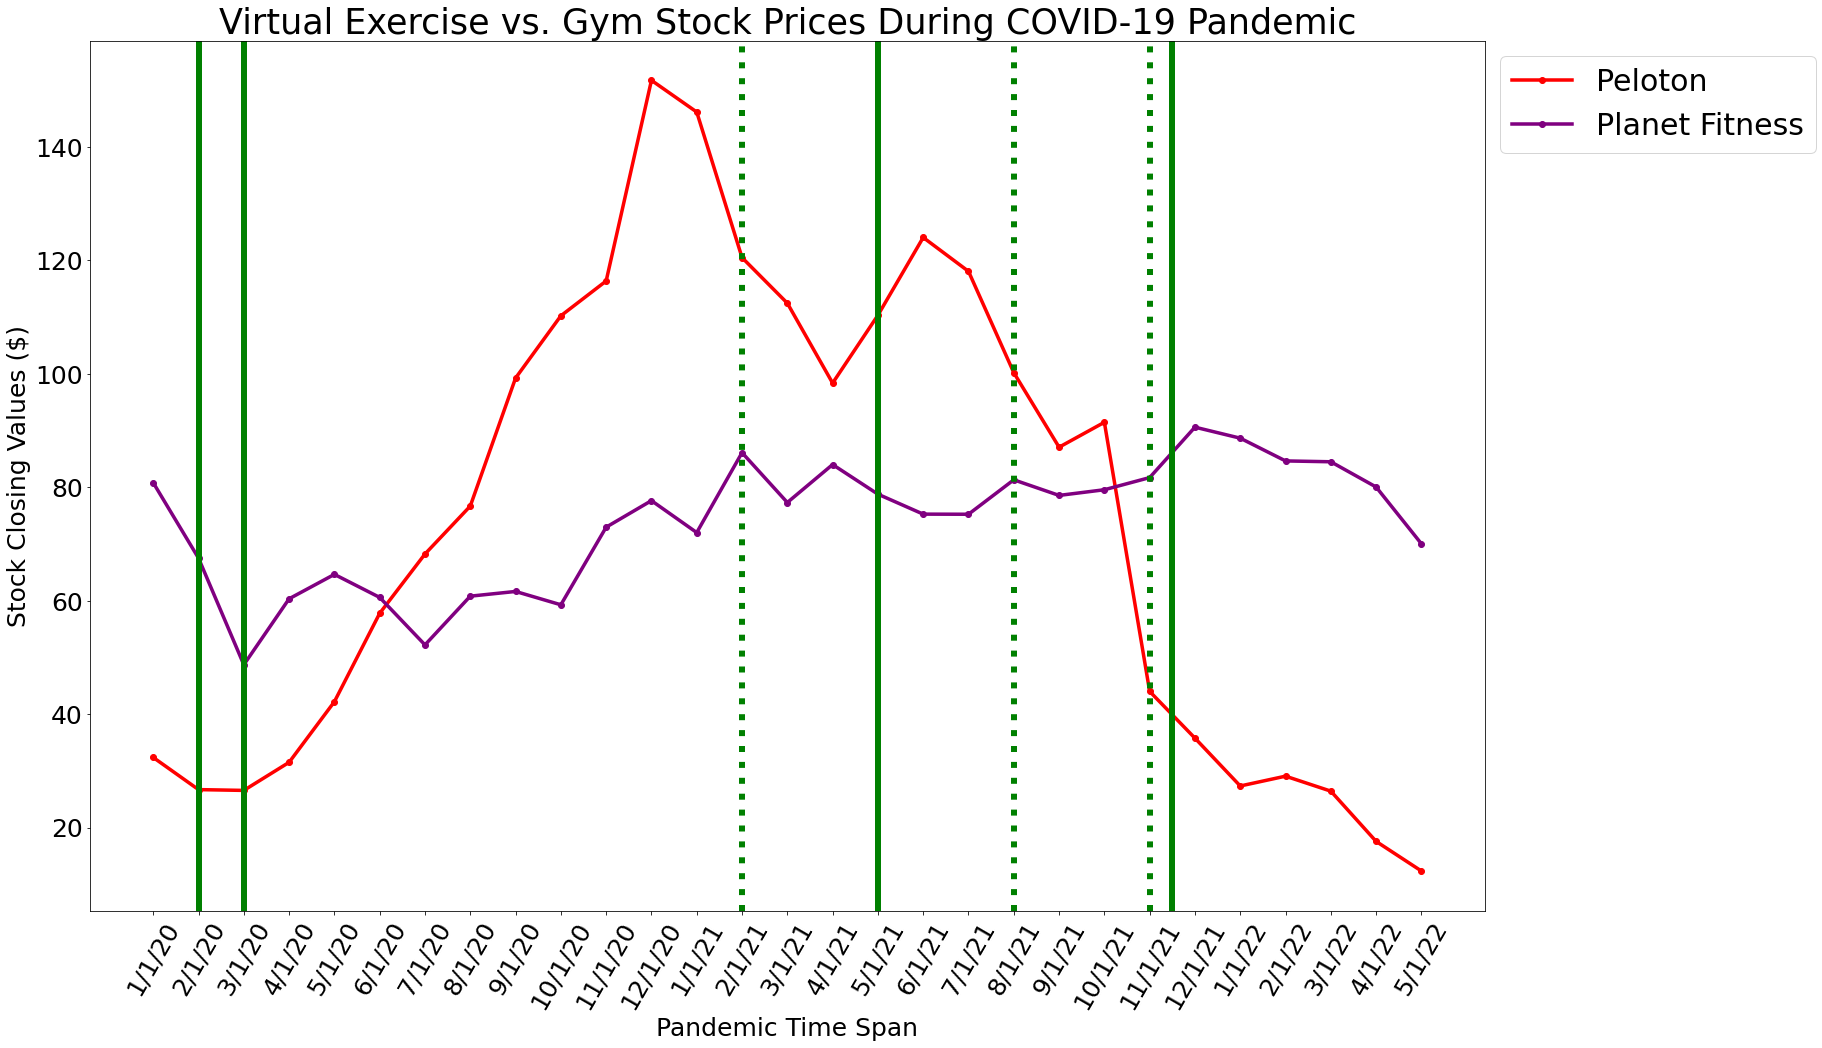

In [46]:
# Plot both stocks in one line chart
fig, ax = plt.subplots(figsize=[25, 16])
ax.plot(PTON_Stock_df["Date"], PTON_Stock_df["Close"], marker = 'o', linewidth=3.5, color='red', label='Peloton')
ax.plot(PLNT_Stock_df["Date"], PLNT_Stock_df["Close"], marker = 'o', linewidth=3.5, color='purple', label='Planet Fitness')

plt.xticks(rotation=60, fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel('Pandemic Time Span', fontsize=25)
ax.set_ylabel('Stock Closing Values ($)', fontsize=25)
ax.set_title('Virtual Exercise vs. Gym Stock Prices During COVID-19 Pandemic', fontsize=35)

# add vertical lines
xposition = [1, 2, 16, 22.5]
for xc in xposition:
    plt.axvline(x=xc, color='g', linestyle='-', lw=6)
xposition = [13, 19, 22]
for xc in xposition:
    plt.axvline(x=xc, color='g', linestyle=':', lw=6)
plt.legend(fontsize=30, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# COVID-19 Impact of US Airline Stocks

Data sets pulled from Yahoo Finance for United Airlines and Delta Airlines historical stock data per month. COVID-19 disease designation and vaccine rollout dates compared against monthly stock closing prices per company.

In [47]:
#Files to Load
delta_airline_data_load = "Airlines_Data/DAL.csv"
united_airline_data_load = "Airlines_Data/UAL.csv"

#Read Delta and United Airline Data Files and store into Pandas DataFrames
delta_airline_df = pd.read_csv(delta_airline_data_load)
united_airline_df = pd.read_csv(united_airline_data_load)

# Combine the data into a single dataset
# airlines_data_combined_df = pd.merge(delta_airline_data_df,united_airline_data_df, how="left", on=["Date", "Date"])           
# airlines_data_combined_df

In [48]:
delta_airline_df["Airline"] = "Delta"

In [49]:
delta_airline_df["Date"] = delta_airline_df["Date"].astype("datetime64")

In [50]:
delta_airline_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Airline
0,2020-01-01,58.930000,62.480000,55.430000,55.740002,55.357456,173131800,Delta
1,2020-02-01,56.200001,60.029999,45.029999,46.130001,45.813408,165222100,Delta
2,2020-03-01,46.220001,49.970001,19.100000,28.530001,28.530001,823679400,Delta
3,2020-04-01,26.590000,27.600000,20.760000,25.910000,25.910000,1351787400,Delta
4,2020-05-01,24.950001,27.850000,17.510000,25.209999,25.209999,1171815600,Delta


In [51]:
united_airline_df["Airline"] = "United"

In [52]:
united_airline_df["Date"] = united_airline_df["Date"].astype("datetime64")

In [53]:
united_airline_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Airline
0,2020-01-01,89.570000,90.570000,74.440002,74.800003,74.800003,98401800,United
1,2020-02-01,75.489998,82.720001,60.830002,61.590000,61.590000,99928300,United
2,2020-03-01,61.130001,63.529999,17.799999,31.549999,31.549999,472476700,United
3,2020-04-01,29.510000,34.040001,21.559999,29.580000,29.580000,847463100,United
4,2020-05-01,28.100000,32.750000,18.180000,28.040001,28.040001,1157715300,United


In [54]:
Airlines_Stocks_df = pd.concat([delta_airline_df, united_airline_df], axis=0)

In [56]:
# Setting the Date as index
Airlines_Stocks_df = Airlines_Stocks_df.set_index("Date")
Airlines_Stocks_df

,Open,High,Low,Close,Adj Close,Volume,Airline
Date,,,,,,,
2020-01-01,58.930000,62.480000,55.430000,55.740002,55.357456,173131800,Delta
2020-02-01,56.200001,60.029999,45.029999,46.130001,45.813408,165222100,Delta
2020-03-01,46.220001,49.970001,19.100000,28.530001,28.530001,823679400,Delta
2020-04-01,26.590000,27.600000,20.760000,25.910000,25.910000,1351787400,Delta
2020-05-01,24.950001,27.850000,17.510000,25.209999,25.209999,1171815600,Delta
2020-06-01,25.330000,37.240002,25.080000,28.049999,28.049999,1333078400,Delta
2020-07-01,29.020000,29.850000,24.430000,24.969999,24.969999,571216100,Delta
2020-08-01,24.850000,32.209999,24.379999,30.850000,30.850000,463825600,Delta
2020-09-01,30.020000,35.070000,27.920000,30.580000,30.580000,464823400,Delta


In [57]:
mean_df = Airlines_Stocks_df.groupby("Airline").mean()["Close"]
mean_df

Airline
Delta     38.502414
United    44.827931
Name: Close, dtype: float64

In [58]:
median_df = Airlines_Stocks_df.groupby("Airline").median()["Close"]
median_df

Airline
Delta     39.689999
United    44.400002
Name: Close, dtype: float64

In [59]:
variance_df = Airlines_Stocks_df.groupby("Airline").var()["Close"]
variance_df

Airline
Delta      60.294121
United    110.674280
Name: Close, dtype: float64

In [60]:
standard_deviation_df = Airlines_Stocks_df.groupby("Airline").std()["Close"]
standard_deviation_df

Airline
Delta      7.764929
United    10.520184
Name: Close, dtype: float64

In [61]:
standard_error_df = Airlines_Stocks_df.groupby("Airline").sem()["Close"]
standard_error_df

Airline
Delta     1.441911
United    1.953549
Name: Close, dtype: float64

In [62]:
summary_table_df = pd.DataFrame({"Mean":mean_df, 
                           "Median":median_df, 
                           "Variance": variance_df, 
                           "Standard Deviation":standard_deviation_df, 
                           "Standard Error": standard_error_df
                          })
summary_table_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Airline,,,,,
Delta,38.502414,39.689999,60.294121,7.764929,1.441911
United,44.827931,44.400002,110.674280,10.520184,1.953549


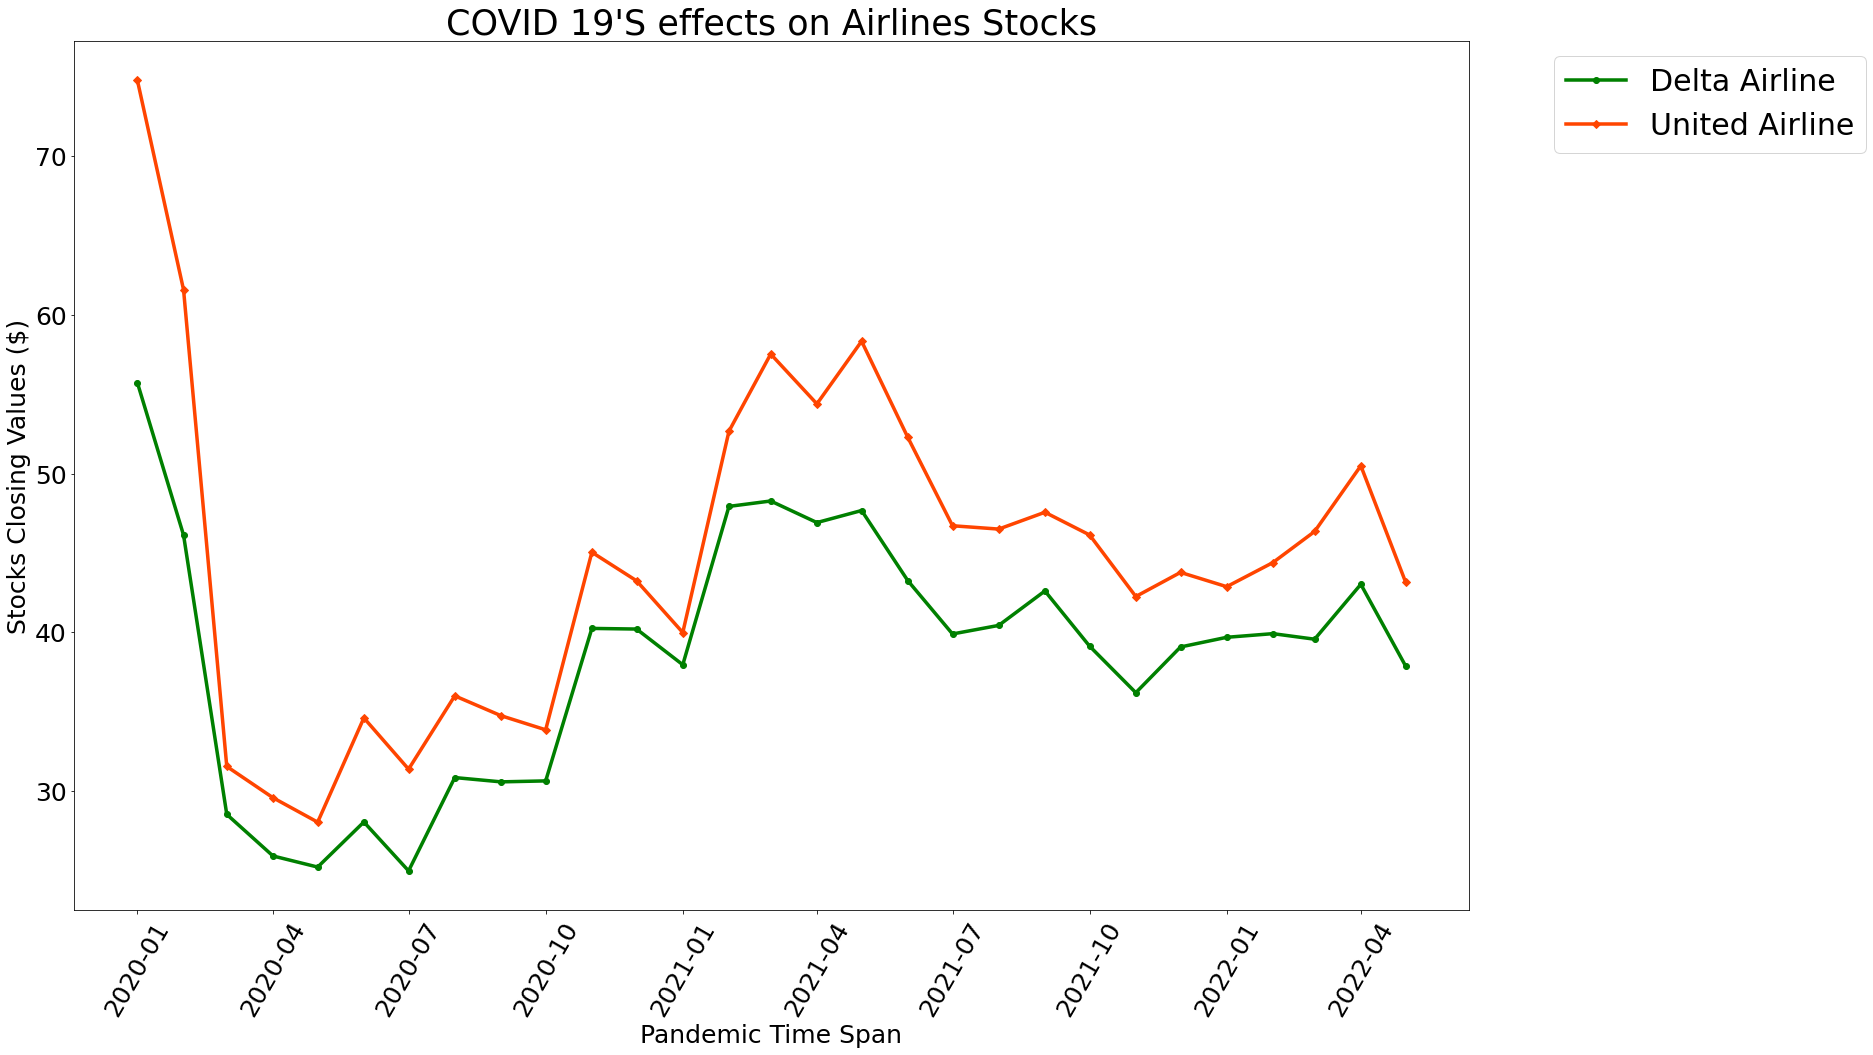

In [63]:
# Plot a simple line chart
fig, ax = plt.subplots(figsize=[25, 16])
ax.plot(delta_airline_df['Date'], delta_airline_df['Close'], marker = 'o', linewidth=3.5, color='g', label='Delta Airline')
ax.plot(delta_airline_df['Date'], united_airline_df['Close'], marker = 'D', linewidth=3.5, color='orangered', label='United Airline')

plt.xticks(rotation=60, fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel('Pandemic Time Span', fontsize=25)
ax.set_ylabel('Stocks Closing Values ($)', fontsize=25)
ax.set_title("COVID 19'S effects on Airlines Stocks", fontsize=35)

plt.legend(fontsize=30, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()



# Global Impact on Bitcoin Price

In [64]:
# read csv to df
df_crypto = pd.read_csv('./Crypto_Data/BTC-USD.csv')


df_no_index = df_crypto

In [65]:
# show df data types - need date to be datetime
df_crypto.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [67]:
# set date as the index and create it as datetime data type 
df_crypto.index = pd.to_datetime(df_crypto['Date'], format = '%Y-%m-%d')

# Q1 Did Bitcoin spend more time below the 200-day simple moving average (SMA) during the years impacted by COVID-19 (2020, 2021, 2022)?

Methodology: The 200-day SMA can be plotted along side a financial assets price chart to visual show the asset's price relative to the 200-day SMA. Price below the 200-day SMA is a great indicator of significant sell pressure on a financial asset and can be used to determine COVID-19's impact on Bitcoin's price.

In [71]:
# Create additional columns for log 10 closing prices, 200 DMA closing prices, log 10 200 DMA closing prices
df_crypto['Closing Log 10'] = np.log10(df_crypto['Close'])
df_crypto['MA 200'] = df_crypto['Close'].rolling(200).mean()
df_crypto['MA 200 Log 10'] = np.log10(df_crypto['MA 200'])

In [72]:
# empty lists for finding dates and percentages below 200 DMA
price_below_date = []
price_below_percent = []
price = 0

# for loop appending dates and prices below 200 DMA to blank lists
for index, row in df_no_index.iterrows():
    price = 0
    if row['Close'] < row['MA 200']:
        price_below_date.append(row['Date'])
        price = 100 - ((row['Close'] * 100)/row['MA 200'])
        price_below_percent.append(price)

In [73]:
# dictionary for merging new lists
percent_difference_dict = {'Date': price_below_date, 'Percentage Down': price_below_percent}

# making dictionary a dataframe
percent_difference_df = pd.DataFrame(percent_difference_dict)

# adding datetime index
percent_difference_df.index = pd.to_datetime(percent_difference_df['Date'], format = '%Y-%m-%d')

#grouping by year and rounding 2 places
percent_difference_df_grouped = percent_difference_df.groupby(by=[percent_difference_df.index.year]).mean()
percent_difference_df_grouped = percent_difference_df_grouped.round(decimals=2)

#get rid of index for easier plotting
percent_difference_df_grouped = percent_difference_df_grouped.reset_index()
percent_difference_df_grouped

,Date,Percentage Down
0,2015,12.12
1,2018,20.78
2,2019,21.30
3,2020,14.70
4,2021,13.34
5,2022,15.42


In [74]:
# find average percentage down among all years for horizontal line
avg_percentage_down = percent_difference_df_grouped['Percentage Down'].mean()

Text(0.5, 1.0, "Bitcoin's Percentage Price Below 200-day SMA by Year")

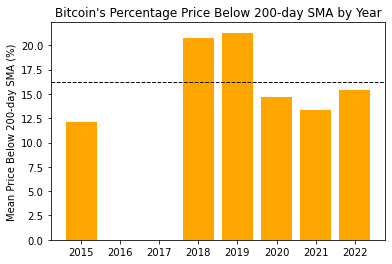

In [75]:
# plot average percentage down
plt.bar(x = percent_difference_df_grouped['Date'], height = percent_difference_df_grouped['Percentage Down'], color = 'orange')
plt.axhline(y=avg_percentage_down,linewidth=1, color='k', ls='--')

plt.ylabel('Mean Price Below 200-day SMA (%)')
plt.title("Bitcoin's Percentage Price Below 200-day SMA by Year")

# Q2 During 2020 and 2021, what were the average price changes each month and did COVID-19 variant news impact monthly price change with signficance?

In [76]:
#break up dataframe date column
df_no_index[['Year','Month','Day']] = df_no_index.Date.str.split('-', expand = True)
df_no_index_filter = df_no_index.loc[(df_no_index['Year'] == '2020') | (df_no_index['Year'] == '2021') | (df_no_index['Year'] == '2022')]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
df_no_index_grouped = df_no_index_filter.groupby(['Year','Month']).mean()

In [77]:
#find price changes 
df_no_index_grouped_change = df_no_index_grouped.pct_change()

Text(0, 0.5, 'Mean Price Change (%)')

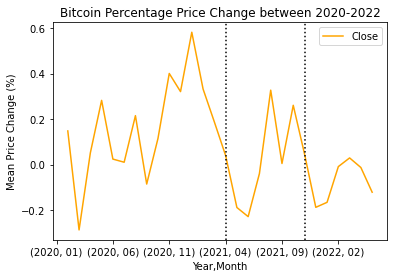

In [78]:
#need a way to add vertical lines to plot for covid dates
q2 = df_no_index_grouped_change.plot(y = 'Close', use_index=True, title='Bitcoin Percentage Price Change between 2020-2022', color='orange')
q2.axvline(x = 15, color='black', ls=':')
q2.axvline(x = 22, color='black', ls=':')
q2.set_ylabel('Mean Price Change (%)') 